In [87]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [111]:
# Utility functions

def get_targets(data):
    y1 = data.pop('is_red')
    #y1 = np.array(y1)
    y2 = data.pop('alcohol')
    #y2 = np.array(y2)
    return y1, y2

def normalize(x, stats_set):
    if stats_set == 'train':
        return (x - train_stats['mean'])/(train_stats['std'])
    elif stats_set == 'test':
        return (x - test_stats['mean'])/(test_stats['std'])


# Plotting utilities
def plot_metric(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label='Training')
    plt.plot(history.history['val_'+ metric_name], color='green', label='Validation')
    plt.legend(loc='best')

In [82]:
# Load datasets
white = pd.read_csv("C:/Users/marek/Deep Learning/Data/Wine/winequality-white.csv", sep=';')
red = pd.read_csv("C:/Users/marek/Deep Learning/Data/Wine/winequality-red.csv", sep=';')

In [83]:
# Create red/white column
white['is_red'] = 0
red['is_red'] = 1

# Concatenate variables
df = pd.concat([red, white])

In [84]:
# Prepare the data
train, test = train_test_split(df, test_size=0.2)

train_Y = get_targets(train)
test_Y = get_targets(test)

train_stats = train.describe()
test_stats = test.describe()

train_stats = train_stats.transpose()
test_stats = test_stats.transpose()

train_X_norm = normalize(train, 'train')
test_X_norm = normalize(test, 'test')

In [96]:
len(train.columns)

11

In [104]:
# Build Model
input_layer = Input(shape=(len(train.columns), ))
first_dense = Dense(128, activation='relu')(input_layer)
second_dense = Dense(128, activation='relu')(first_dense)

wine_type = Dense(1, activation='sigmoid', name='wine_type')(second_dense)
wine_alcohol = Dense(1, activation='relu', name='wine_alcohol')(second_dense)

model = Model(inputs=[input_layer], outputs=[wine_type, wine_alcohol])


In [105]:
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rms, 
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_alcohol' : 'mse'
                     },
              metrics = {'wine_type' : 'accuracy',
                         'wine_alcohol': tf.keras.metrics.RootMeanSquaredError()
                       }
             )

In [106]:
history = model.fit(train_X_norm, train_Y, epochs=100, validation_data=(test_X_norm, test_Y))

Epoch 1/100
163/163 [==============================] - 10s 58ms/step - loss: 81.0200 - wine_type_loss: 0.6241 - wine_alcohol_loss: 80.3959 - wine_type_accuracy: 0.7441 - wine_alcohol_root_mean_squared_error: 8.9664 - val_loss: 52.1336 - val_wine_type_loss: 0.6036 - val_wine_alcohol_loss: 51.5300 - val_wine_type_accuracy: 0.7385 - val_wine_alcohol_root_mean_squared_error: 7.1784
Epoch 2/100
163/163 [==============================] - 2s 11ms/step - loss: 30.4330 - wine_type_loss: 0.5630 - wine_alcohol_loss: 29.8700 - wine_type_accuracy: 0.7577 - wine_alcohol_root_mean_squared_error: 5.4653 - val_loss: 12.2695 - val_wine_type_loss: 0.5291 - val_wine_alcohol_loss: 11.7404 - val_wine_type_accuracy: 0.7385 - val_wine_alcohol_root_mean_squared_error: 3.4264
Epoch 3/100
163/163 [==============================] - 2s 10ms/step - loss: 9.0696 - wine_type_loss: 0.4248 - wine_alcohol_loss: 8.6448 - wine_type_accuracy: 0.7805 - wine_alcohol_root_mean_squared_error: 2.9402 - val_loss: 5.9067 - val_wi

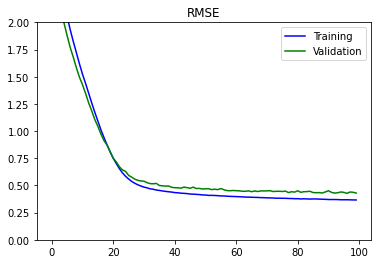

In [119]:
plot_metric('wine_alcohol_root_mean_squared_error', 'RMSE', ylim=2)

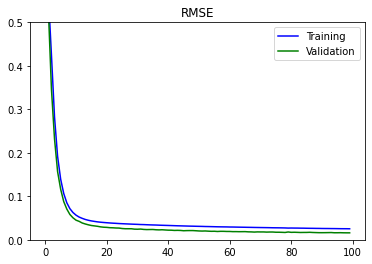

In [118]:
plot_metric('wine_type_loss', 'RMSE', ylim=0.5)